Mundenhof Base Station (NE)
===

Date: 23.11.2022

Time: 11:52:24 - 12:00:40 GMT+1

Duration: 0:08:16

Movement: Static

GPS update period: 0.25 s

## Summary of the Analysis

- The LLA cordinate is believed to be 48.0096575°N, 7.78509467°E, 276.6 m
- Carrier range was never fully available so the error maybe higher than the other 2 points

# Data Pre-processing

## Load CSV File

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

filename = "tableview_221123_135708_full.csv"  # update csv filename here

frequency = 4   # update data update rate

# Reference point information
ref_lla = [48.012317, 7.813296, 289.4]  # Geodetic: Lat, Lon, Alt (HAE)
ref_lla_err = [1.1, 0.8, 0.1 ]  # errors in m
ref_ecef = [4235206.8, 581152.46, 4718007.72]  # Earth Centered - Earth Fixed: x, y, z

df = pd.read_csv(filename)

# Convert UTC column to datetime
df["UTC"] = pd.to_datetime(df["UTC"])

## Additional Data

In [2]:
df["DGPS"] = df["DGPS"].eq("Yes").astype(int)
df["dT"] = df["UTC"].diff() / np.timedelta64(1, "s")
df["Alt (HAE) Rate of Change"] = df["Alt (HAE)"].diff() * df["dT"]
df["Alt Error"] = df["Alt (HAE)"] - ref_lla[2]
df["ECEF Error X"] = df["X"] - ref_ecef[0]
df["ECEF Error Y"] = df["Y"] - ref_ecef[1]
df["ECEF Error Z"] = df["Z"] - ref_ecef[2]
df["ECEF Error"] = np.sqrt(df["ECEF Error X"] ** 2 + df["ECEF Error Y"] ** 2 + df["ECEF Error Z"] ** 2)

## Unuseful a.t.m
df["X Diff"] = df["X"].diff()
df["Y Diff"] = df["Y"].diff()
df["Z Diff"] = df["Z"].diff()
df["Distance Change"] = np.sqrt(df["X Diff"] ** 2 + df["Y Diff"] ** 2 + df["Z Diff"] ** 2)
df["Velocity"] = df["Distance Change"] * df["dT"]

# Summary of data frame
df.info()
pd.set_option('display.max_columns', None)
df.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     1721 non-null   int64         
 1   UTC                       1721 non-null   datetime64[ns]
 2   GPS time                  1721 non-null   object        
 3   Fix type (GPS)            1721 non-null   object        
 4   DGPS                      1721 non-null   int64         
 5   Carrier Range Status      1721 non-null   int64         
 6   X                         1721 non-null   float64       
 7   Y                         1721 non-null   float64       
 8   Z                         1721 non-null   float64       
 9   Lat                       1721 non-null   float64       
 10  Lon                       1721 non-null   float64       
 11  Alt (HAE)                 1721 non-null   float64       
 12  Alt (MSL)           

Index                     UTC         GPS time Fix type (GPS)  DGPS  \
1718   1718 2022-11-23 10:31:32.750  2237:297110.750             3D     1   
1719   1719 2022-11-23 10:31:33.000  2237:297111.000             3D     1   
1720   1720 2022-11-23 10:31:33.250  2237:297111.250             3D     1   

      Carrier Range Status            X           Y            Z        Lat  \
1718                     1  4235701.588  579096.389  4717800.412  48.009658   
1719                     1  4235701.588  579096.389  4717800.412  48.009658   
1720                     1  4235701.590  579096.377  4717800.412  48.009658   

           Lon  Alt (HAE)  Alt (MSL)  VX  VY  VZ  VN  VE  VD   SoG  VACC 3D  \
1718  7.785094      276.6      229.3 NaN NaN NaN NaN NaN NaN  0.00      NaN   
1719  7.785094      276.6      229.3 NaN NaN NaN NaN NaN NaN  0.01      NaN   
1720  7.785094      276.6      229.3 NaN NaN NaN NaN NaN NaN  0.02      NaN   

      2d Err  HDOP  VDOP  PDOP  SVs Tracked  SVs Used  \
1718     NaN   0.6   1.1   1.3           42        30   
1719     NaN   0.6   1.1   1.3           42        30   
1720     NaN   0.6   1.1   1.3           42        30   

                                               Used SVs    dT  \
1718  G2 G5 G6 G7 G9 G11 G13 G20 G30 R3 R4 R5 R14 R1...  0.25   
1719  G2 G5 G6 G7 G9 G11 G13 G20 G30 R3 R4 R5 R14 R1...  0.25   
1720  G2 G5 G6 G7 G9 G11 G13 G20 G30 R3 R4 R5 R14 R1...  0.25   

      Alt (HAE) Rate of Change  Alt Error  ECEF Error X  ECEF Error Y  \
1718                       0.0      -12.8       494.788     -2056.071   
1719                       0.0      -12.8       494.788     -2056.071   
1720                       0.0      -12.8       494.790     -2056.083   

      ECEF Error Z   ECEF Error  X Diff  Y Diff  Z Diff  Distance Change  \
1718      -207.308  2124.904640   0.000   0.000     0.0         0.000000   
1719      -207.308  2124.904640   0.000   0.000     0.0         0.000000   
1720      -207.308  2124.916717   0.002  -0.012     0.0         0.012166   

      Velocity  
1718  0.000000  
1719  0.000000  
1720  0.003041

# Basic Statistics

In [3]:
print("Number of data points:", df["Index"].count())

idx_RTK_lockin = df.loc[(df["DGPS"] == 1) & (df["Carrier Range Status"] > 0)].index[0]

print(f"Index of first RTK lock-in: {idx_RTK_lockin}")

df.describe()

Number of data points: 1721
Index of first RTK lock-in: 0


Index    DGPS  Carrier Range Status             X              Y  \
count  1721.000000  1721.0                1721.0  1.721000e+03    1721.000000   
mean    860.000000     1.0                   1.0  4.235702e+06  579096.416093   
std     496.954223     0.0                   0.0  2.338919e-01       0.115337   
min       0.000000     1.0                   1.0  4.235701e+06  579095.984000   
25%     430.000000     1.0                   1.0  4.235701e+06  579096.367000   
50%     860.000000     1.0                   1.0  4.235702e+06  579096.395000   
75%    1290.000000     1.0                   1.0  4.235702e+06  579096.500000   
max    1720.000000     1.0                   1.0  4.235702e+06  579096.634000   

                  Z          Lat          Lon    Alt (HAE)    Alt (MSL)   VX  \
count  1.721000e+03  1721.000000  1721.000000  1721.000000  1721.000000  0.0   
mean   4.717800e+06    48.009658     7.785095   276.481464   229.181464  NaN   
std    1.447683e-01     0.000001     0.000001     0.250184     0.250184  NaN   
min    4.717800e+06    48.009657     7.785090   275.400000   228.100000  NaN   
25%    4.717800e+06    48.009657     7.785094   276.400000   229.100000  NaN   
50%    4.717800e+06    48.009658     7.785095   276.600000   229.300000  NaN   
75%    4.717800e+06    48.009658     7.785096   276.600000   229.300000  NaN   
max    4.717801e+06    48.009664     7.785098   276.700000   229.400000  NaN   

        VY   VZ   VN   VE   VD          SoG  VACC 3D  2d Err         HDOP  \
count  0.0  0.0  0.0  0.0  0.0  1721.000000      0.0     0.0  1721.000000   
mean   NaN  NaN  NaN  NaN  NaN     0.010924      NaN     NaN     0.612841   
std    NaN  NaN  NaN  NaN  NaN     0.006864      NaN     NaN     0.033465   
min    NaN  NaN  NaN  NaN  NaN     0.000000      NaN     NaN     0.600000   
25%    NaN  NaN  NaN  NaN  NaN     0.010000      NaN     NaN     0.600000   
50%    NaN  NaN  NaN  NaN  NaN     0.010000      NaN     NaN     0.600000   
75%    NaN  NaN  NaN  NaN  NaN     0.010000      NaN     NaN     0.600000   
max    NaN  NaN  NaN  NaN  NaN     0.060000      NaN     NaN     0.700000   

              VDOP         PDOP  SVs Tracked     SVs Used       dT  \
count  1721.000000  1721.000000  1721.000000  1721.000000  1720.00   
mean      1.113655     1.307554    39.815224    28.973852     0.25   
std       0.034347     0.026433     2.530654     1.089010     0.00   
min       1.100000     1.300000    25.000000    13.000000     0.25   
25%       1.100000     1.300000    41.000000    28.000000     0.25   
50%       1.100000     1.300000    41.000000    29.000000     0.25   
75%       1.100000     1.300000    41.000000    30.000000     0.25   
max       1.200000     1.400000    42.000000    30.000000     0.25   

       Alt (HAE) Rate of Change    Alt Error  ECEF Error X  ECEF Error Y  \
count               1720.000000  1721.000000   1721.000000   1721.000000   
mean                   0.000029   -12.918536    494.708935  -2056.043907   
std                    0.005187     0.250184      0.233892      0.115337   
min                   -0.025000   -14.000000    494.001000  -2056.476000   
25%                    0.000000   -13.000000    494.644000  -2056.093000   
50%                    0.000000   -12.800000    494.800000  -2056.065000   
75%                    0.000000   -12.800000    494.858000  -2055.960000   
max                    0.025000   -12.700000    494.929000  -2055.826000   

       ECEF Error Z   ECEF Error       X Diff       Y Diff       Z Diff  \
count   1721.000000  1721.000000  1720.000000  1720.000000  1720.000000   
mean    -207.400155  2124.869026     0.000356    -0.000083    -0.000151   
std        0.144768     0.110011     0.014749     0.006115     0.016653   
min     -208.200000  2124.611300    -0.080000    -0.027000    -0.112000   
25%     -207.444000  2124.780097     0.000000     0.000000     0.000000   
50%     -207.358000  2124.899915     0.000000     0.000000     0.000000   
75%     -207.308000  2124.9

# Navigation Status

In [4]:
# Helper Functions
# TODO: Make it a module for import

def highlight_carrier_status(ax, df):
    idxes = df[df["Carrier Range Status"].diff() != 0 ].index.tolist()
    idxes.append(df.index.max()+1)
    
    for start, end in zip(idxes, idxes[1:]):
        status = df["Carrier Range Status"][start]
        if status == 1:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="blue")
        elif status == 2:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="green")
        else:
            ax.axvspan(df["UTC"][start], df["UTC"][end-1], alpha=0.2, color="red")


Red region: No solution for carrier-phase measurement (carrier-range status = 0)
Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)
Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)


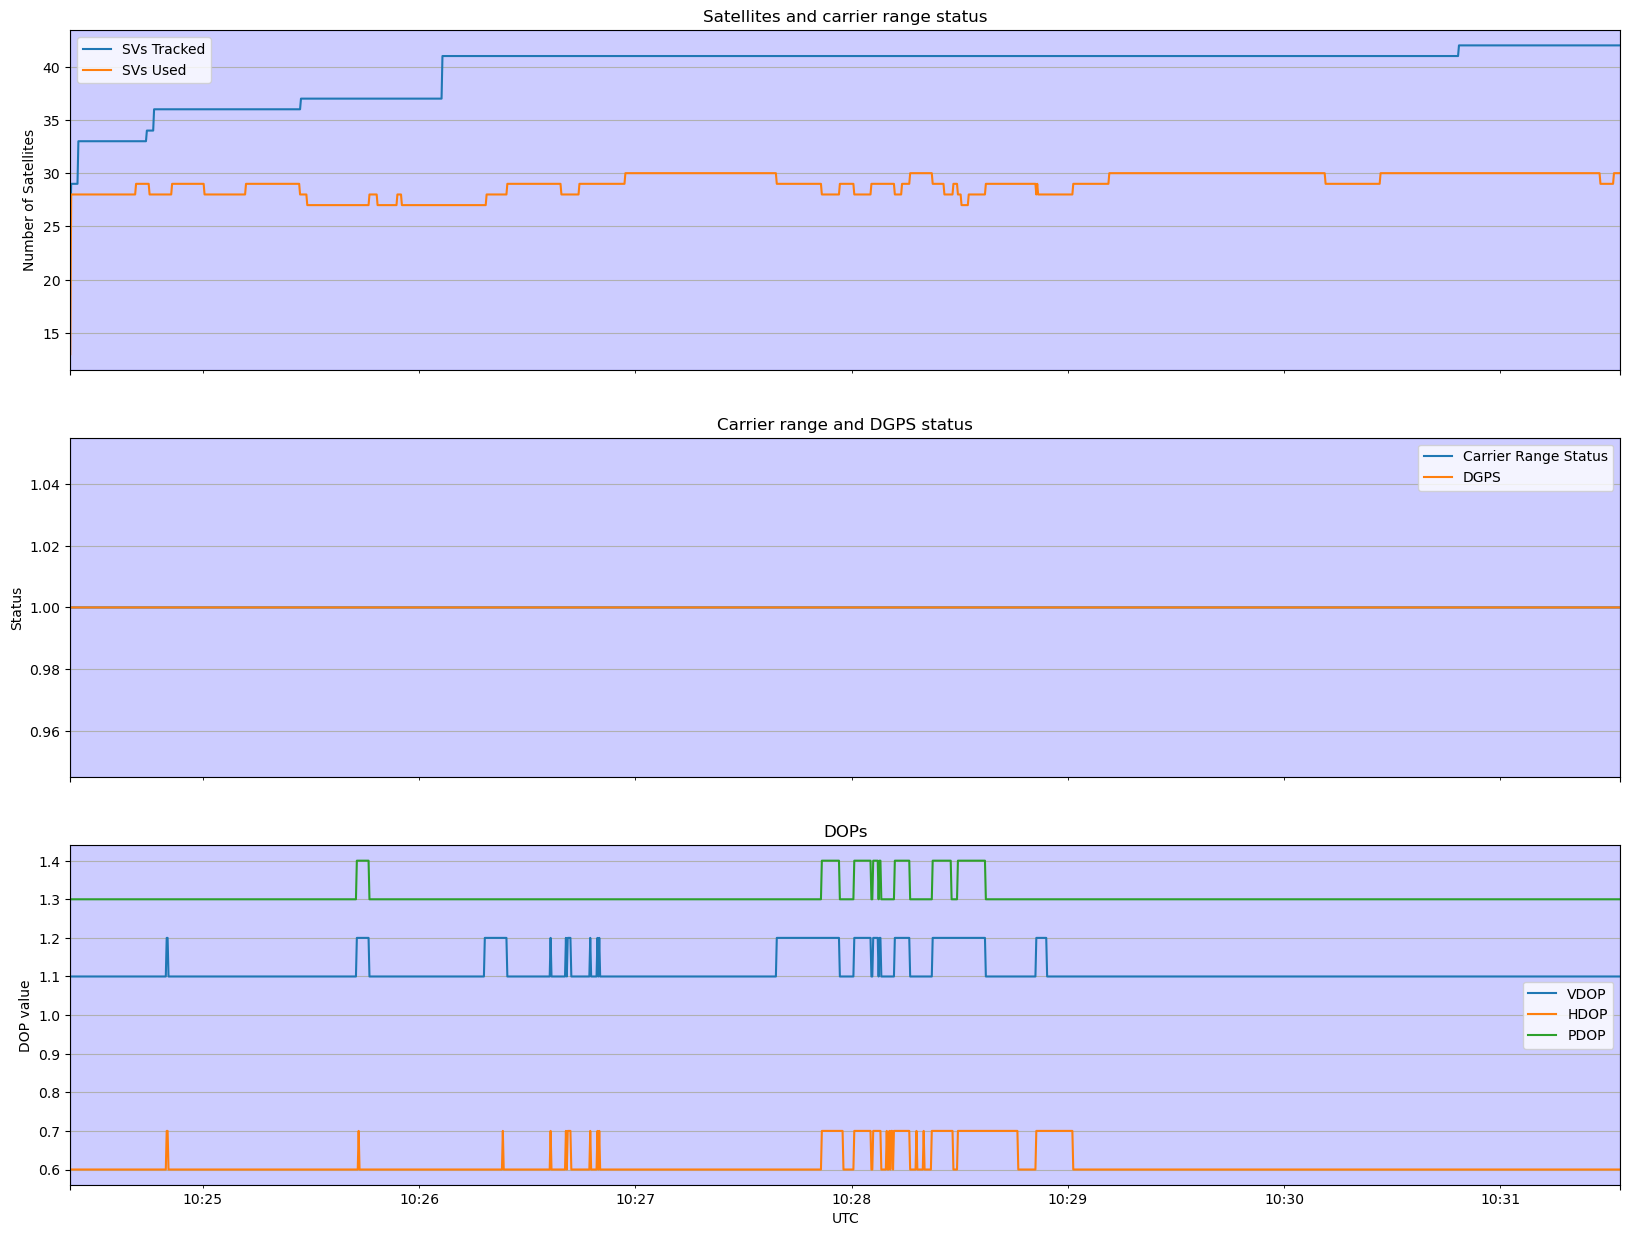

Total no. of data points = 1721
Data points without carrier range availability = 0 (0.00%)
Data points with "float" carrier range status = 1721 (100.00%)
Data points with "fix" carrier range status = 0 (0.00%)


In [5]:
print("Red region: No solution for carrier-phase measurement (carrier-range status = 0)")
print("Blue region: Float mode for carrier range. Not all carrier-phase ambiguities are resolved. (carrier-range status = 1)")
print("Green resion: Fix mode for carrier range. All carrier-phase ambiguities are resolved. (carrier-range status = 2)")

fig, ax = plt.subplots(3, 1, figsize=(20, 15), sharex=True)

df.plot(ax=ax[0],
        title="Satellites and carrier range status",
        x="UTC",
        y=["SVs Tracked", "SVs Used"],
        ylabel="Number of Satellites",
        grid=True)

df.plot(ax=ax[1],
        title="Carrier range and DGPS status",
        x="UTC",
        y=["Carrier Range Status", "DGPS"],
        ylabel="Status",
        grid=True)

df.plot(ax=ax[2],
        title="DOPs",
        x="UTC",
        y=["VDOP", "HDOP", "PDOP"],
        ylabel="DOP value",
        grid=True)

for i in range(3):
    highlight_carrier_status(ax[i], df)

plt.show()

df_cs = df["Carrier Range Status"]
df_cs_total_cnt = df_cs.count()
df_cs_nofix_cnt = df_cs[df_cs == 0].count()
df_cs_float_cnt = df_cs[df_cs == 1].count()
df_cs_fix_cnt = df_cs[df_cs == 2].count()

print(f"Total no. of data points = {df_cs_total_cnt}")
print(f"Data points without carrier range availability = {df_cs_nofix_cnt} ({df_cs_nofix_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"float\" carrier range status = {df_cs_float_cnt} ({df_cs_float_cnt / df_cs_total_cnt * 100:0.2f}%)")
print(f"Data points with \"fix\" carrier range status = {df_cs_fix_cnt} ({df_cs_fix_cnt / df_cs_total_cnt * 100:0.2f}%)")

## Observations

- High number of satellites in track/ used
- Carrier range ambiguities were never been fixed. Measurement time maybe too short.

# Altitude (HAE)

Altitude of reference point: 289.4 m +- 0.1 m


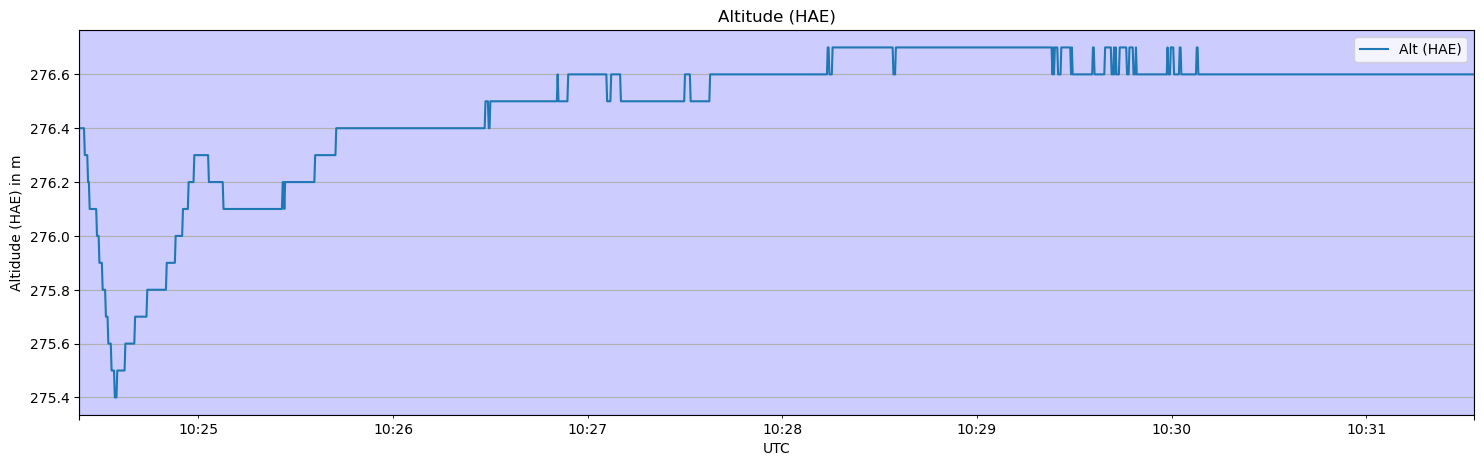

In [6]:
###
# Plot altitude vs time
###

print(f"Altitude of reference point: {ref_lla[2]} m +- {ref_lla_err[2]} m")

fig1, ax = plt.subplots(1, 1, figsize=(18, 5), sharex=True)
ax.set_title("Altitude (HAE)")
df.plot(ax=ax, x="UTC", y="Alt (HAE)", grid=True)
ax.set_ylabel("Altidude (HAE) in m")
highlight_carrier_status(ax, df)  # highight region according to carrier-phase status

## Carrier phase status
#ax[1].set_ylabel("Status")
#df.plot(ax=ax[1], x="UTC", y=["Carrier Range Status", "DGPS"], grid=True)

## VDOP
#ax[2].set_ylabel("VDOP")
#df.plot(ax=ax[2], x="UTC", y="VDOP", style='g-', grid=True)
#ax[0].set_xlabel("Time (UTC)")

#for i in range(3):
#    ax[i].axvspan(df["UTC"][0], df["UTC"][idx_RTK_lockin], alpha=0.2, color="red")

plt.show()

## Carrier Range = Float Only

In [7]:
###
# Helper functions for error evaluatinn
###

def ecdf(a: np.array):
    """
    Returns a tuple (value, #occurence) of the fiven data vector a
    """
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_hist_acdf_stat(ds, bins, quantile, hist_title, acdf_title, xlabel, unit):
    
    # Plot histogram
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    ds.hist(ax=ax[0], bins=bins)
    ax[0].set_title(hist_title)
    ax[0].set_ylabel("Frequency")
    ax[0].set_xlabel(f"{xlabel} ({unit})")
    , 
    # Plot CDF
    x, cusum = ecdf(ds)
    
    ax[1].plot(x, cusum)
    #ds_abs.hist(ax=ax[1], cumulative=True, density=False, bins=bins, histtype="stepfilled")
    ax[1].set_title(acdf_title)
    ax[1].set_ylabel("Likelihood of occurrence")
    ax[1].set_xlabel(f"{xlabel} ({unit})")
    ax[1].set_ylim((0.0, 1.1))
    plt.show()
    
    # List out statistics
    print("===Statistics (After RTK In-force)===")
    print("mean:", ds.mean(), unit)
    print("median:", ds.median(), unit)
    #print("mode:", ds.mode(), unit)
    print("max:", ds.max(), unit)
    print("min:", ds.min(), unit)
    
    for q in quantile:
        print(f"{(int)(q*100):d}th-percentile: {ds.quantile(q=q)} {unit}")

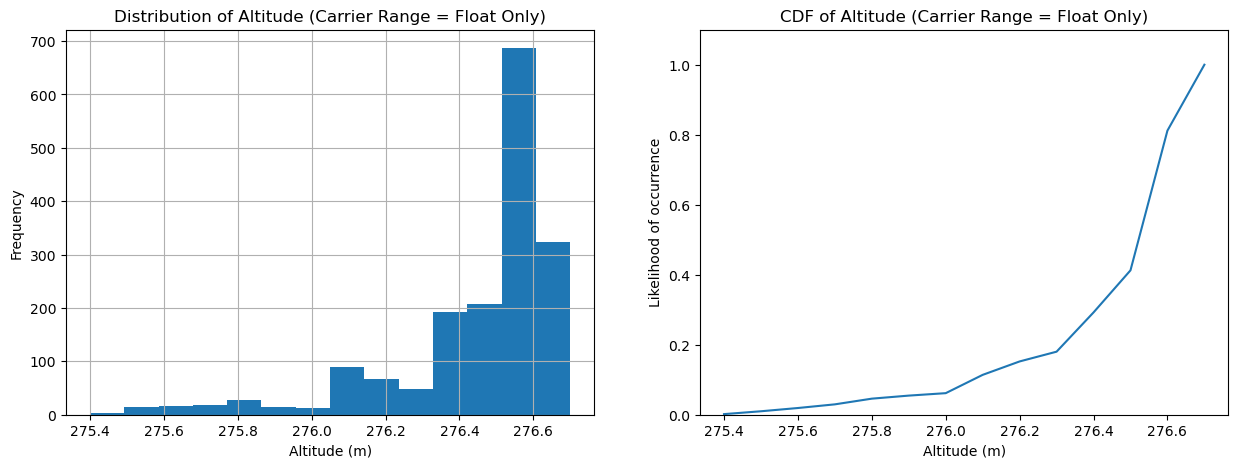

===Statistics (After RTK In-force)===
mean: 276.48146426496214 m
median: 276.6 m
max: 276.7 m
min: 275.4 m
95th-percentile: 276.7 m
88th-percentile: 276.7 m
50th-percentile: 276.6 m
25th-percentile: 276.4 m


In [8]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 1][idx_RTK_lockin:]
alt = df_carrier_2["Alt (HAE)"]
alt_bins = (int)(math.ceil((alt.max() - alt.min())*10))
plot_hist_acdf_stat(alt,
                      bins = alt_bins,
                      quantile = [0.95, 0.88, 0.5, 0.25],
                      hist_title = "Distribution of Altitude (Carrier Range = Float Only)",
                      acdf_title = "CDF of Altitude (Carrier Range = Float Only)",
                      xlabel = "Altitude",
                      unit = "m")

## Observations

- Most of the output fell between 276.6 and 276.7 m
- Take the median, the altitude is believed to be 276.6 m

# Position

In [9]:
# Helper function
# TODO: move to python module
def dist_lat_lon_to_meter(lat2, lat1, lon2, lon1):
    # Use Haversine formula to find distance (in m) between 2 point in lat/lon coordinate
    r = 6371  # approximate radius of earth
    
    dlat = math.radians(lat2) - math.radians(lat1)
    dlon = math.radians(lon2) - math.radians(lon1)

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c * 1000

# Position Map

In [10]:
# Select data
loc = df.loc[:, ["Index", "UTC", "Alt (HAE)", "X", "Y", "Z", "Lat", "Lon", "HDOP"]]
loc_rtk = df.loc[:, ["Index", "UTC", "X", "Y", "Z", "Lat", "Lon"]][idx_RTK_lockin:]

# Basic statistics
lat = loc_rtk["Lat"]
lat_max = lat.max()
lat_max_idx = lat.idxmax()
lat_max_utc = loc_rtk["UTC"][lat_max_idx]
lat_min = lat.min()
lat_min_idx = lat.idxmin()
lat_mean = lat.mean()
lat_median = lat.median()
lat_std = lat.std()
lat_var = lat.var()
lat_95til = lat.quantile(q=0.95)

long = loc_rtk["Lon"]
long_max = long.max()
long_max_idx = long.idxmax()
long_max_utc = df["UTC"][long_max_idx]
long_min = long.min()
long_min_idx = long.idxmin()
long_mean = long.mean()
long_median = long.median()
long_std = long.std()
long_var = long.var()
long_95til = long.quantile(q=0.95)

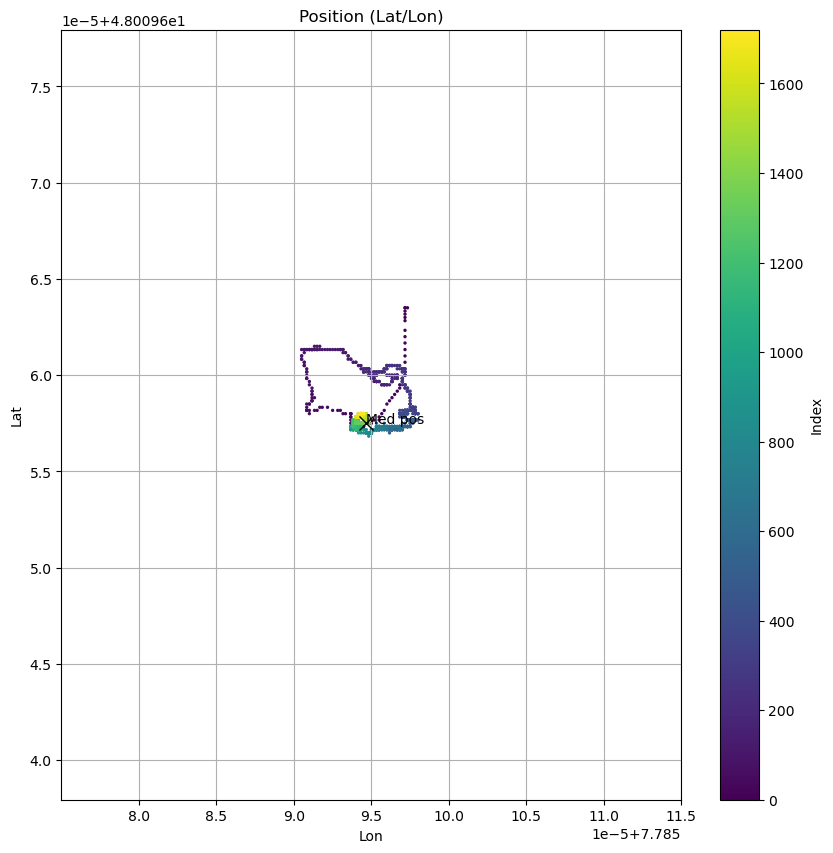

Medium lat/lon: 48.0096575, 7.78509467


In [11]:
###
# Plot position map
###


div = 0.00002

fig = loc.plot.scatter(title="Position (Lat/Lon)",
                       x="Lon",
                       y="Lat",
                       c="Index",
                       xlim=(long_mean - div, long_mean + div),
                       ylim=(lat_mean - div, lat_mean + div),
                       colormap="viridis",
                       colorbar=True,
                       s=2,
                       grid=True,
                       figsize=(10, 10))
plt.plot(long_median, lat_median, marker="x", markersize=10, markeredgecolor="black")  # mark median position
fig.annotate("Med pos", xy=(long_median, lat_median))  # TODO: add arrow
plt.plot(ref_lla[1], ref_lla[0], marker="x", markersize=10, markeredgecolor="red")  # mark reference point
fig.annotate("Ref. pt", xy=(ref_lla[1], ref_lla[0]))  # TODO: add arrow
plt.show()

print(f"Medium lat/lon: {lat_median}, {long_median}")

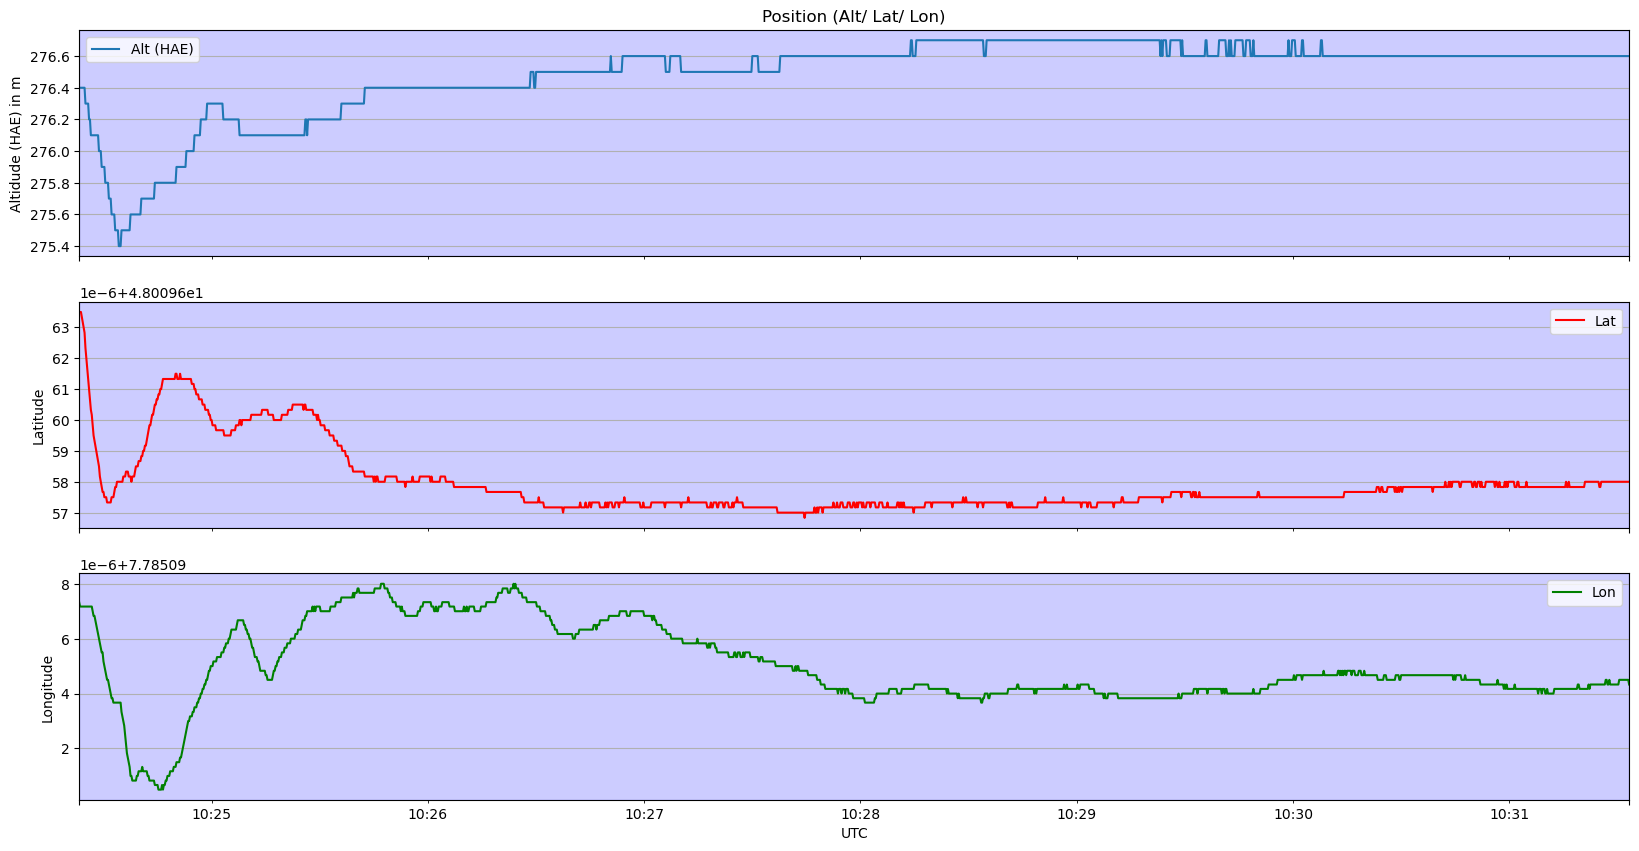

In [12]:
### 
# Plot latitude, longitude, altitude vs time
###

fig, ax = plt.subplots(3, 1, sharex=True, figsize=(20, 10))
ax[0].set_title("Position (Alt/ Lat/ Lon)")
loc.plot(ax=ax[0], x="UTC", y="Alt (HAE)", xlabel="Time (UTC)", ylabel="Altidude (HAE) in m", grid=True)
loc.plot(ax=ax[1], x="UTC", y="Lat", ylabel="Latitude", style='r-', grid=True)
loc.plot(ax=ax[2], x="UTC", y="Lon", ylabel="Longitude", style='g-', grid=True)

## VDOP
#df.plot(ax=ax[3], x="UTC", y="HDOP", style='y-', grid=True)
#ax[3].set_xlabel("Time (UTC)")
#ax[3].set_ylabel("HDOP")

for i in range(3):
    #ax[i].axvspan(df["UTC"][0], df["UTC"][idx_DGPS_lockin], alpha=0.2, color="red")
    highlight_carrier_status(ax[i], df)
plt.show()

## Carrier Range = Float Only

In [13]:
df_carrier_2 = df.loc[df["Carrier Range Status"] == 1][idx_RTK_lockin:]
lat = df_carrier_2["Lat"]
lat_bins = (int)(math.ceil((lat.max() - lat.min())/0.0000001))
plot_hist_acdf_stat(lat,
                  bins = lat_bins,
                  quantile = [0.95, 0.88, 0.5, 0.25],
                  hist_title = "Distribution of Latitude (Carrier Range = Fixed Only)",
                  acdf_title = "CDF of Latitude (Carrier Range = Float Only)",
                  xlabel = "Latitude",
                  unit = "°")

lon = df_carrier_2["Lon"]
lon_bins = (int)(math.ceil((lon.max() - lon.min())/0.0000001))
plot_hist_acdf_stat(df_carrier_2["Lon"],
                          bins = lon_bins,
                          quantile = [0.95, 0.88, 0.5, 0.25],
                          hist_title = "Distribution of Longitude (Carrier Range = Fixed Only)",
                          acdf_title = "CDF of Longitude (Carrier Range = Float Only)",
                          xlabel = "Longitude",
                          unit = "°")

===Statistics (After RTK In-force)===
mean: 48.00965794492736 °
median: 48.0096575 °
max: 48.0096635 °
min: 48.00965683 °
95th-percentile: 48.00966033 °
88th-percentile: 48.00965967 °
50th-percentile: 48.0096575 °
25th-percentile: 48.00965733 °


===Statistics (After RTK In-force)===
mean: 7.78509500182452 °
median: 7.78509467 °
max: 7.785098 °
min: 7.7850905 °
95th-percentile: 7.7850975 °
88th-percentile: 7.78509717 °
50th-percentile: 7.78509467 °
25th-percentile: 7.78509417 °


## Observations

- The median lat/lon is 48.0096575°N, 7.78509467°E

# Ground Speed

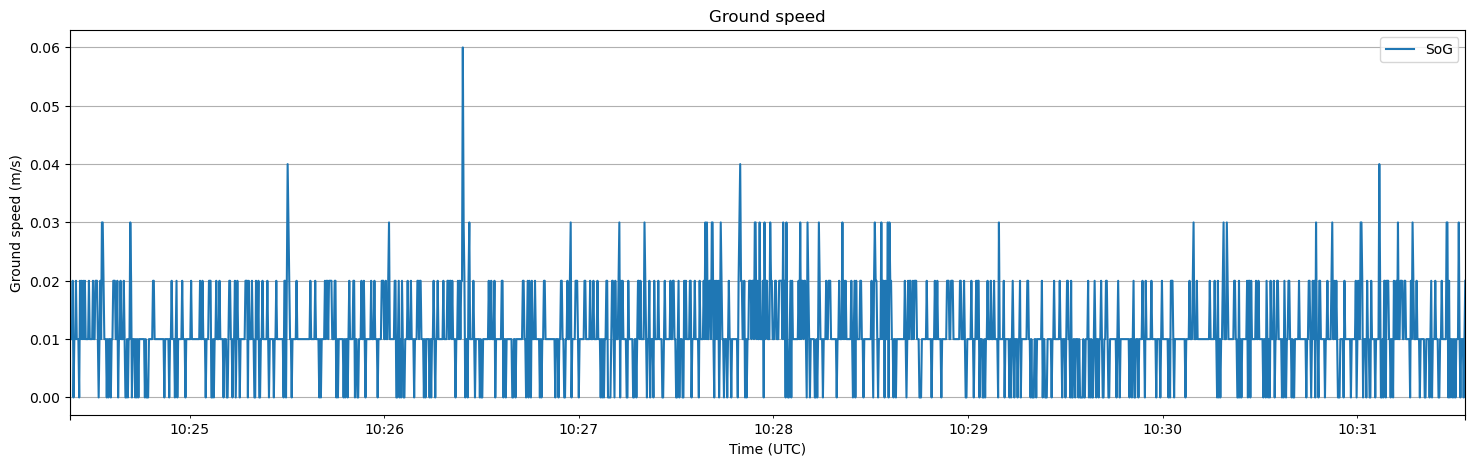

In [14]:
###
# Plot ground speed
###

sog = df.loc[:, ["UTC", "SoG"]]

sog.plot(title="Ground speed", x="UTC", y="SoG", xlabel="Time (UTC)", ylabel="Ground speed (m/s)", figsize=(18, 5), grid=True)
plt.show()

## Observations

- Due to deviation in position measurements, ground speed outputs were not 0 for most of the time